55
55


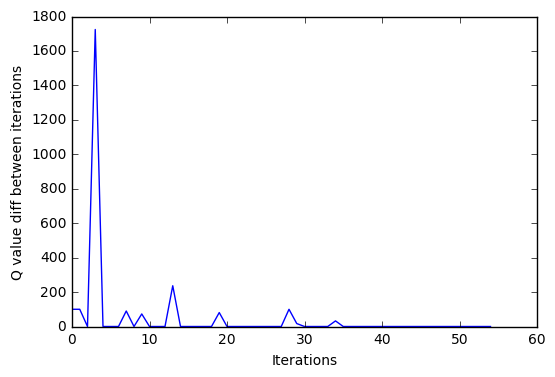

In [40]:



#--------------------------------------------------------Ques 1 -----------------------------------------------------------
import random, copy 
import matplotlib.pyplot as plt

gamma = 0.9 
max_iterations = 100
error_threshold= 0.01 

lookup_state_action_dict = {'s1':[None, 's5', None, 's2'] , 's2':[None, 's6','s1','s3'] ,'s3':[None, 's7', 's2', 's4'], 
                            's4':[None,'s8','s3',None] , 's5':['s1','s9',None,'s6'], 's6':['s2', 's10','s5','s7'],
                            's7':['s3','s11','s6', 's8'], 's8':['s4','s12','s7',None], 's9':['s5',None, None, 's10'],
                            's10':['s6',None, 's9','s11'], 's11':['s7', None, 's10','s12'], 's12':['s8',None, 's11', None]}


R= {'s1':[0,0,0,0], 's2':[0,100,0,0], 's3':[0,0,0,0], 's4':[0,0,0,0], 's5':[0,0,0,100], 's6':[0,0,0,0], 's7':[0,0,100,0],
   's8':[0,0,0,0], 's9':[0,0,0,0], 's10':[100,0,0,0], 's11':[0,0,0,0], 's12':[0,0,0,0]}

#initialize Q 
Q= {}
for key in lookup_state_action_dict:
    Q[key] =[]
    for i in range(0,4):
        if lookup_state_action_dict[key][i] == None:
            Q[key].append(-1)
        else:
            Q[key].append(0)

    
curr_state, action = None, None 

ite =0  #keeps count of current iterations 
diff_vector = [] #accumulates diff over iterations 
error = float('inf')
#while ite < max_iterations:
while error>1 or ite <= 20:
    ite +=1 
    curr_state = random.choice(lookup_state_action_dict.keys())
    old_Q= copy.deepcopy(Q)
    diff =0 
 
    #------------------------------------- inner while loop starts ----------------------------------------
    while curr_state != 's6':
        
        ## Pick action 
        action = random.randrange(0,4)
        while lookup_state_action_dict[curr_state][action] is None:
            action = random.randrange(0,4)
 
        ## Q value computation          
        next_state = lookup_state_action_dict[curr_state][action]
        Q[curr_state][action] = R[curr_state][action] + gamma* max(Q[next_state][:])


        ## Updation for next iteration 
        curr_state= next_state
        action = None 
        #----------------------------------------------------------inner while loop ends --------------------------------------------
    
    
    # Updates for outer loop
    # Plotting vector value updation             
    for key in Q:
        for i in range(4):
            diff += abs(Q[key][i] - old_Q[key][i])
    
    diff_vector.append(diff)

    # Error calculation 
    if len(diff_vector)> 20:
        error = sum(diff_vector[-20:-1])
    else:
        error = float('inf')
   
    
##Final plots at the end 
print(len(diff_vector))
print(ite)
plt.plot(diff_vector)
plt.xlabel("Iterations")
plt.ylabel("Q value diff between iterations")
#plt.ylim([-1,200])
plt.show()






In [5]:
temp_dict ={}

for key in sorted(Q):
    if key=='s10' or key=='s11' or key=='s12':
        temp_dict[key] = Q[key] 
    else:
        print ("%s: %s" % (key, Q[key]))

for key in sorted(temp_dict):
    print ("%s: %s" % (key, temp_dict[key]))

s1: [-1, 90.0, -1, 90.0]
s2: [-1, 100.0, 81.0, 81.0]
s3: [-1, 90.0, 90.0, 72.9]
s4: [-1, 81.0, 81.0, -1]
s5: [81.0, 81.0, -1, 100.0]
s6: [0, 0, 0, 0]
s7: [81.0, 81.0, 100.0, 81.0]
s8: [72.9, 72.9, 90.0, -1]
s9: [90.0, -1, -1, 90.0]
s10: [100.0, -1, 81.0, 81.0]
s11: [90.0, -1, 90.0, 72.9]
s12: [81.0, -1, 81.0, -1]


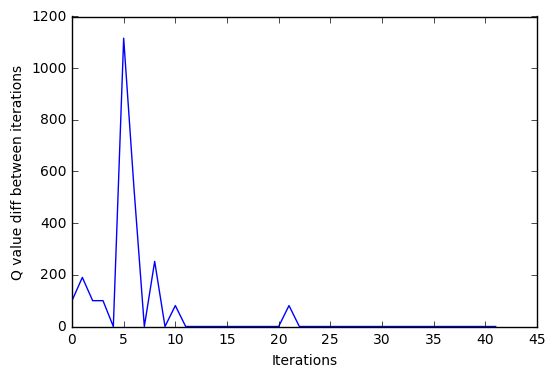

In [19]:



#--------------------------------------------------------Ques 2 -----------------------------------------------------------
import random, copy
import matplotlib.pyplot as plt

epsilon = 1.0
gamma = 0.9 
max_iterations = 200


lookup_state_action_dict = {'s1':[None, 's5', None, 's2'] , 's2':[None, 's6','s1','s3'] ,'s3':[None, 's7', 's2', 's4'], 
                            's4':[None,'s8','s3',None] , 's5':['s1','s9',None,'s6'], 's6':['s2', 's10','s5','s7'],
                            's7':['s3','s11','s6', 's8'], 's8':['s4','s12','s7',None], 's9':['s5',None, None, 's10'],
                            's10':['s6',None, 's9','s11'], 's11':['s7', None, 's10','s12'], 's12':['s8',None, 's11', None]}


#doubt? : s6 reward 0 ?     
R= {'s1':[0,0,0,0], 's2':[0,100,0,0], 's3':[0,0,0,0], 's4':[0,0,0,0], 's5':[0,0,0,100], 's6':[0,0,0,0], 's7':[0,0,100,0],
   's8':[0,0,0,0], 's9':[0,0,0,0], 's10':[100,0,0,0], 's11':[0,0,0,0], 's12':[0,0,0,0]}

#initialize Q 
Q= {}
for key in lookup_state_action_dict:
    Q[key] =[]
    for i in range(0,4):
        if lookup_state_action_dict[key][i] == None:
            Q[key].append(-1)
        else:
            Q[key].append(0.0001*random.randint(0,1))

curr_state, action = None, None 

ite =0  #keeps count of current iterations 
diff_vector = [] #accumulates diff over iterations 
error = float('inf')

while error>1 or ite <= 20:
    ite +=1 
    curr_state = random.choice(lookup_state_action_dict.keys())
    old_Q= copy.deepcopy(Q)
    diff =0 

    #------------------------------------- inner while loop starts ----------------------------------------
    while curr_state != 's6':
        
        ## Pick action 
        rand = random.random()
        if rand> (1-epsilon):
            action = random.randrange(0,4)
            while lookup_state_action_dict[curr_state][action] is None:
                action = random.randrange(0,4)
        else:
            action = lookup_state_action_dict[curr_state].index(max(lookup_state_action_dict[curr_state]))

        
        ## Q value computation          
        next_state = lookup_state_action_dict[curr_state][action]
        Q[curr_state][action] = R[curr_state][action] + gamma* max(Q[next_state][:])

        
        ## Updation for next iteration 
        curr_state= next_state
        action = None 
    
    #----------------------------------------------------------inner while loop ends --------------------------------------------
    
    # Updates for outer loop
    # Plotting vector value updation         
    for key in Q:
        for i in range(4):
            diff += abs(Q[key][i] - old_Q[key][i])
    
    diff_vector.append(diff)

    # Error calculation 
    if len(diff_vector)> 20:
        error = sum(diff_vector[-20:-1])
    else:
        error = float('inf')
       
    
plt.plot(diff_vector)
plt.xlabel("Iterations")
plt.ylabel("Q value diff between iterations")
#plt.ylim([-1,100])
plt.show()



In [20]:
temp_dict ={}

for key in sorted(Q):
    if key=='s10' or key=='s11' or key=='s12':
        temp_dict[key] = Q[key] 
    else:
        print ("%s: %s" % (key, Q[key]))

for key in sorted(temp_dict):
    print ("%s: %s" % (key, temp_dict[key]))

s1: [-1, 90.0, -1, 90.0]
s2: [-1, 100.0, 81.0, 81.0]
s3: [-1, 90.0, 90.0, 72.9]
s4: [-1, 81.0, 81.0, -1]
s5: [81.0, 81.0, -1, 100.0]
s6: [0.0, 0.0, 0.0, 0.0]
s7: [81.0, 81.0, 100.0, 81.0]
s8: [72.9, 72.9, 90.0, -1]
s9: [90.0, -1, -1, 90.0]
s10: [100.0, -1, 81.0, 81.0]
s11: [90.0, -1, 90.0, 72.9]
s12: [81.0, -1, 81.0, -1]


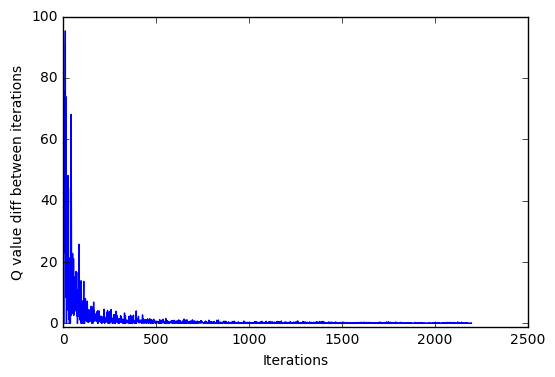

{'s9': [0, 0, 0, 0], 's8': [0, 0, 0, 0], 's3': [0, 0, 0, 0], 's12': [0, 0, 0, 0], 's11': [0, 0, 0, 0], 's10': [67, 0, 14, 16], 's7': [9, 10, 71, 10], 's6': [0, 0, 0, 0], 's5': [13, 13, 0, 70], 's4': [0, 0, 0, 0], 's2': [0, 71, 14, 14], 's1': [0, 0, 0, 0]}


In [23]:



#--------------------------------------------------------Ques 3 -----------------------------------------------------------
import random, copy 
import matplotlib.pyplot as plt

gamma = 0.9 
max_iterations = 1000


lookup_state_action_dict = {'s1':[None, 's5', None, 's2'] , 's2':[None, 's6','s1','s3'] ,'s3':[None, 's7', 's2', 's4'], 
                            's4':[None,'s8','s3',None] , 's5':['s1','s9',None,'s6'], 's6':['s2', 's10','s5','s7'],
                            's7':['s3','s11','s6', 's8'], 's8':['s4','s12','s7',None], 's9':['s5',None, None, 's10'],
                            's10':['s6',None, 's9','s11'], 's11':['s7', None, 's10','s12'], 's12':['s8',None, 's11', None]}


#doubt? : s6 reward 0 ?     
R= {'s1':[0,0,0,0], 's2':[0,100,0,0], 's3':[0,0,0,0], 's4':[0,0,0,0], 's5':[0,0,0,100], 's6':[0,0,0,0], 's7':[0,0,100,0],
   's8':[0,0,0,0], 's9':[0,0,0,0], 's10':[100,0,0,0], 's11':[0,0,0,0], 's12':[0,0,0,0]}

visit_matrix = {}
expected_R = {}

for key in R:
    visit_matrix[key]= [0,0,0,0]
    expected_R[key]= [0,0,0,0]



#initialize Q 
Q= {}

for key in lookup_state_action_dict:
    Q[key] =[]
    for i in range(0,4):
        if lookup_state_action_dict[key][i] == None:
            Q[key].append(-1)
        else:
            Q[key].append(0)

    
#i = random.choice(lookup_state_action_dict.keys())
curr_state, intended_action, observed_action = None, None, None 

ite =0  #keeps count of current iterations 
diff_vector = [] #accumulates diff over iterations 
error = float('inf')

while error>1 or ite <= 20:
    ite +=1 
    curr_state = random.choice(lookup_state_action_dict.keys())
    old_Q= copy.deepcopy(Q)
    diff =0 
    
    #----------------------------------------------------------inner while loop starts --------------------------------------------
    while curr_state != 's6':
        
        ## Pick "intended_action"    
        intended_action = random.randrange(0,4)
        while lookup_state_action_dict[curr_state][intended_action] is None:
            intended_action = random.randrange(0,4)
            
        
        ## Pick "observed_action" based on probability
        no_of_legal_action = -1 
        for i in range(4):
            if lookup_state_action_dict[curr_state][i] is not None:
                no_of_legal_action +=1 
       
        cumulative_prob_vector = []
        value = 0  #temp variable 
        for i in range(0,4):
            if i == intended_action:
                value += 0.7 
                cumulative_prob_vector.append(value)
            elif lookup_state_action_dict[curr_state][i] is not None:
                value+=0.3/no_of_legal_action
                cumulative_prob_vector.append(value)
            else:
                cumulative_prob_vector.append(value)
        
        rand_no= random.uniform(0,1)
        
        for i in range(0,4):
            if rand_no < cumulative_prob_vector[i]:
                observed_action = i
                break
    
        ## Q value computation          
        visit_matrix[curr_state][intended_action] +=1 
        alpha = 1/float((1+visit_matrix[curr_state][intended_action]))
        #print(alpha)
        next_state = lookup_state_action_dict[curr_state][observed_action]    
        determininstic_Q = R[curr_state][observed_action] + gamma *max(Q[next_state][:])
        prior_Q= Q[curr_state][intended_action]                            
        Q[curr_state][intended_action] = (1-alpha)*prior_Q + alpha*determininstic_Q
        expected_R[curr_state][intended_action] += R[curr_state][observed_action]
        #Q[curr_state][intended_action] = R[curr_state][final_action] + gamma* max(Q[next_state][:])
        #print(str(curr_state)+"--" + str(Q[curr_state]))
        #print(curr_state + "--" + str(action))
#     if next_state == 's6':
#         curr_state= None 
#     else:
        ## Updation for next iteration 
        curr_state= next_state
        observed_action, intended_action = None, None 
        #----------------------------------------------------------inner while loop ends --------------------------------------------
    
    # Updates for outer loop
    # Plotting vector value updation                 
    for key in Q:
        for i in range(4):
            diff += abs(Q[key][i] - old_Q[key][i])
    #print(diff)
    diff_vector.append(diff)

    # Error calculation 
    if len(diff_vector)> 20:
        error = sum(diff_vector[-20:-1])
    else:
        error = float('inf')
           
    
##expected_R computation 
for state in expected_R:
    for i in range(4):
        if visit_matrix[state][i] !=0:
            expected_R[state][i] /= visit_matrix[state][i]
        
##Final plots at the end 
plt.plot(diff_vector)
plt.xlabel("Iterations")
plt.ylabel("Q value diff between iterations")
plt.ylim([-1,100])
plt.show()
print(expected_R)





In [22]:
temp_dict ={}

for key in sorted(Q):
    if key=='s10' or key=='s11' or key=='s12':
        temp_dict[key] = Q[key] 
    else:
        print ("%s: %s" % (key, Q[key]))

for key in sorted(temp_dict):
    print ("%s: %s" % (key, temp_dict[key]))

s1: [-1, 76.75713292072267, -1, 78.01699839186291]
s2: [-1, 89.81681151455756, 70.55092646279441, 69.6973255195056]
s3: [-1, 73.09093727278734, 75.12311091548294, 59.61529187914093]
s4: [-1, 59.67218520089838, 62.233770240402414, -1]
s5: [68.55233462669466, 67.7450362768091, -1, 88.92058496847756]
s6: [0, 0, 0, 0]
s7: [66.8495881273777, 65.92182275634303, 87.90007759699687, 62.937668163663005]
s8: [55.19191245526066, 53.904234588743634, 68.64539620184055, -1]
s9: [75.53184072968979, -1, -1, 74.75446859829968]
s10: [87.03467818995577, -1, 67.50164616789081, 67.42096580693207]
s11: [72.14689656528772, -1, 71.06338438445525, 57.422528066729186]
s12: [58.808994335070835, -1, 60.63541023725721, -1]


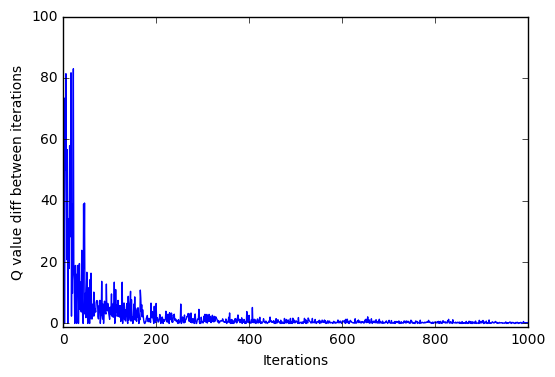

In [38]:

#--------------------------------------------------------Ques 4 -----------------------------------------------------------
import random, copy 
import matplotlib.pyplot as plt

epsilon = 1.0
gamma = 0.9 
max_iterations = 1000


lookup_state_action_dict = {'s1':[None, 's5', None, 's2'] , 's2':[None, 's6','s1','s3'] ,'s3':[None, 's7', 's2', 's4'], 
                            's4':[None,'s8','s3',None] , 's5':['s1','s9',None,'s6'], 's6':['s2', 's10','s5','s7'],
                            's7':['s3','s11','s6', 's8'], 's8':['s4','s12','s7',None], 's9':['s5',None, None, 's10'],
                            's10':['s6',None, 's9','s11'], 's11':['s7', None, 's10','s12'], 's12':['s8',None, 's11', None]}


#doubt? : s6 reward 0 ?     
R= {'s1':[0,0,0,0], 's2':[0,100,0,0], 's3':[0,0,0,0], 's4':[0,0,0,0], 's5':[0,0,0,100], 's6':[0,0,0,0], 's7':[0,0,100,0],
   's8':[0,0,0,0], 's9':[0,0,0,0], 's10':[100,0,0,0], 's11':[0,0,0,0], 's12':[0,0,0,0]}

visit_matrix = {}
expected_R = {}

for key in R:
    visit_matrix[key]= [0,0,0,0]
    expected_R[key]= [0,0,0,0]



#initialize Q 
Q= {}

for key in lookup_state_action_dict:
    Q[key] =[]
    for i in range(0,4):
        if lookup_state_action_dict[key][i] == None:
            Q[key].append(-1)
        else:
            Q[key].append(0.0001*random.randint(0,1))

    
#i = random.choice(lookup_state_action_dict.keys())
curr_state, intended_action, observed_action = None, None, None 

ite =0  #keeps count of current iterations 
diff_vector = [] #accumulates diff over iterations 

while ite < max_iterations:
    ite +=1 
    curr_state = random.choice(lookup_state_action_dict.keys())
    old_Q= copy.deepcopy(Q)
    diff =0 
    
    #----------------------------------------------------------inner while loop starts --------------------------------------------
    while curr_state != 's6':
 
        ## Pick "intended_action"    
        rand = random.random()
        if rand> (1-epsilon):
            intended_action = random.randrange(0,4)
            while lookup_state_action_dict[curr_state][intended_action] is None:
                intended_action = random.randrange(0,4)
        else:
            intended_action = lookup_state_action_dict[curr_state].index(max(lookup_state_action_dict[curr_state]))
        
        ## Pick "observed_action" based on probability
        no_of_legal_action = -1 
        for i in range(4):
            if lookup_state_action_dict[curr_state][i] is not None:
                no_of_legal_action +=1 
       
        cumulative_prob_vector = []
        value = 0  #temp variable 
        for i in range(0,4):
            if i == intended_action:
                value += 0.7 
                cumulative_prob_vector.append(value)
            elif lookup_state_action_dict[curr_state][i] is not None:
                value+=0.3/no_of_legal_action
                cumulative_prob_vector.append(value)
            else:
                cumulative_prob_vector.append(value)
        
        rand_no= random.uniform(0,1)
        
        for i in range(0,4):
            if rand_no < cumulative_prob_vector[i]:
                observed_action = i
                break

    
        ## Q value computation          
        visit_matrix[curr_state][intended_action] +=1 
        alpha = 1/float((1+visit_matrix[curr_state][intended_action]))
        #print(alpha)
        next_state = lookup_state_action_dict[curr_state][observed_action]    
        determininstic_Q = R[curr_state][observed_action] + gamma *max(Q[next_state][:])
        prior_Q= Q[curr_state][intended_action]                            
        Q[curr_state][intended_action] = (1-alpha)*prior_Q + alpha*determininstic_Q
        expected_R[curr_state][intended_action] += R[curr_state][observed_action]

        
        ## Updation for next iteration 
        curr_state= next_state
        observed_action, intended_action = None, None 
        #----------------------------------------------------------inner while loop ends --------------------------------------------
    
    # Updates for outer loop
    # Plotting vector value updation                 
    for key in Q:
        for i in range(4):
            diff += abs(Q[key][i] - old_Q[key][i])
    #print(diff)
    diff_vector.append(diff)

    # Error calculation 
    if len(diff_vector)> 20:
        error = sum(diff_vector[-20:-1])
    else:
        error = float('inf')
       
    
    
##expected_R computation 
for state in expected_R:
    for i in range(4):
        if visit_matrix[state][i] !=0:
            expected_R[state][i] /= float(visit_matrix[state][i])
        
##Final plots at the end 
plt.plot(diff_vector)
plt.xlabel("Iterations")
plt.ylabel("Q value diff between iterations")
plt.ylim([-1,100])
plt.show()






In [39]:
print(expected_R)
temp_dict ={}

for key in sorted(Q):
    if key=='s10' or key=='s11' or key=='s12':
        temp_dict[key] = Q[key] 
    else:
        print ("%s: %s" % (key, Q[key]))

for key in sorted(temp_dict):
    print ("%s: %s" % (key, temp_dict[key]))

{'s9': [0.0, 0, 0, 0.0], 's8': [0.0, 0.0, 0.0, 0], 's3': [0, 0.0, 0.0, 0.0], 's12': [0.0, 0, 0.0, 0], 's11': [0.0, 0, 0.0, 0.0], 's10': [74.27385892116183, 0, 14.937759336099585, 17.083333333333332], 's7': [13.059701492537313, 7.8431372549019605, 67.01754385964912, 10.0], 's6': [0, 0, 0, 0], 's5': [17.112299465240643, 13.218390804597702, 0, 68.31683168316832], 's4': [0, 0.0, 0.0, 0], 's2': [0, 67.00507614213198, 13.953488372093023, 13.716814159292035], 's1': [0, 0.0, 0, 0.0]}
s1: [-1, 74.48536640484781, -1, 72.62436404932872]
s2: [-1, 85.20260650996931, 64.23493176694957, 60.33317294714182]
s3: [-1, 67.54747559302757, 65.98088990159451, 46.57418300810189]
s4: [-1, 51.317997969790426, 51.932036305331884, -1]
s5: [67.90313507226746, 70.53191905387713, -1, 88.20070255023312]
s6: [0.0001, 0.0, 0.0, 0.0]
s7: [59.324052926153385, 62.41085391483087, 84.86463547926566, 56.69258643838025]
s8: [44.69753686794406, 48.470120617611, 63.9928015965784, -1]
s9: [77.2064043588779, -1, -1, 79.7474862328

In [43]:
#--------------------------------------------------------Ques 6 -----------------------------------------------------------

estimated_Q= {} 
for keys in expected_R:
    estimated_Q[keys] = [0,0,0,0]
    
    #TODO: dont compute for -1 illegal moves. So intiitlize properly and skip those 
    for i in range(4):
        res= expected_R[keys][i]
        
        no_of_legal_action = -1 
        #Find legal actions 
        for j in range(4):
            if lookup_state_action_dict[keys][j] is not None:
                no_of_legal_action +=1 
                
        #for each legal action, add term 
        for j in range(4):
            if lookup_state_action_dict[keys][j] is not None:
                next_state = lookup_state_action_dict[keys][j] 
                if j==i:
                    res += gamma* 0.7* max(Q[next_state][:])
                else:
                    res += gamma* (0.3/no_of_legal_action)* max(Q[next_state][:])
            
        estimated_Q[keys][i]= res 

#print(estimated_Q)

{'s9': [80.79098687217936, 48.36959457608101, 48.36959457608101, 80.44099504809067], 's8': [55.16900514720616, 53.20673427855313, 69.07294770627529, 26.617303069805185], 's3': [31.336325511690347, 73.79197014816044, 75.22883900735054, 59.88802758909132], 's12': [59.19794750735227, 36.126073568653375, 61.22229772149231, 36.126073568653375], 's11': [73.31289504398774, 30.857250407517633, 74.95542605653091, 57.44668161626557], 's10': [92.97171827539803, 19.97166877539803, 70.69376324170395, 65.47897698555157], 's7': [67.95559135603298, 66.1025922997355, 86.4583100704771, 61.06606697852544], 's6': [79.70560530222546, 79.92996401497427, 80.45495175110732, 78.1381120012908], 's5': [71.81185719491233, 73.83652328656696, 21.114428820261054, 92.11447832026106], 's4': [36.552573096802114, 59.62444703550101, 62.2174632871727, 36.552573096802114], 's2': [20.17819142356659, 90.17824092356659, 76.87561979821788, 70.46741543532615], 's1': [48.2574152197066, 80.67880751580495, 48.2574152197066, 80.179

In [44]:
temp_dict ={}

for key in sorted(estimated_Q):
    if key=='s10' or key=='s11' or key=='s12':
        temp_dict[key] = estimated_Q[key] 
    else:
        print ("%s: %s" % (key, estimated_Q[key]))

for key in sorted(temp_dict):
    print ("%s: %s" % (key, temp_dict[key]))

s1: [48.2574152197066, 80.67880751580495, 48.2574152197066, 80.17924321655039]
s2: [20.17819142356659, 90.17824092356659, 76.87561979821788, 70.46741543532615]
s3: [31.336325511690347, 73.79197014816044, 75.22883900735054, 59.88802758909132]
s4: [36.552573096802114, 59.62444703550101, 62.2174632871727, 36.552573096802114]
s5: [71.81185719491233, 73.83652328656696, 21.114428820261054, 92.11447832026106]
s6: [79.70560530222546, 79.92996401497427, 80.45495175110732, 78.1381120012908]
s7: [67.95559135603298, 66.1025922997355, 86.4583100704771, 61.06606697852544]
s8: [55.16900514720616, 53.20673427855313, 69.07294770627529, 26.617303069805185]
s9: [80.79098687217936, 48.36959457608101, 48.36959457608101, 80.44099504809067]
s10: [92.97171827539803, 19.97166877539803, 70.69376324170395, 65.47897698555157]
s11: [73.31289504398774, 30.857250407517633, 74.95542605653091, 57.44668161626557]
s12: [59.19794750735227, 36.126073568653375, 61.22229772149231, 36.126073568653375]
